# 2_ANALYSIS_Solar Wind Hydro


#### 2 Plots and analysis based on previous data extraction

* Execute this sequentially in 2nd place to analyze data

In [15]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import sem
import gmaps
import os
import json

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)



# Import API key
# from config import weather_api_key
# from config import g_key

# Range of latitudes and longitudes for the whole earth. 
# Lat +90 -90 degrees from Equator to North and South Pole
# longitude East West from Greenwich meridian + - 180 degrees
lat_range = (-90, 90)
lng_range = (-180, 180)

# NOTE. When I commit and push to send my work to GitHub, both Google and WeatherMap 
# sent me mails telling that my API Keys are blocked due to the fact that sending them in 
# config.py or any other folder make them public and can be compromised

# Study data files
path = "data/final_data_df.csv"

# Read the mouse data and the study results
working_weather_data_df = pd.read_csv(path, index_col=0)
working_weather_data_df = working_weather_data_df.dropna()
working_weather_data_df


,Lat,Lng,Local Wind (kph),Altitude (m),state_id,State,timezone,Sun Radiation (h),Precip_inch,Precip_mm,mean elevation feet,mean elevation meters,Hydro cons (BTU),Solar cons (BTU),Wind cons (BTU)
City,,,,,,,,,,,,,,,
Palmer,42.1584,-72.3287,2.57,105.523598,MA,Massachusetts,EST,2634.0,47.7,1211.0,500,153,10.3,28.2,2.0
Laramie,41.3114,-105.5911,2.57,2184.666504,WY,Wyoming,MST,3073.0,12.9,328.0,"6,700","2,044",8.9,0.1,36.9
Jamestown,42.0970,-79.2353,3.04,419.865387,NY,New York,EST,2120.0,41.8,1062.0,"1,000",305,269.8,17.7,36.4
Willmar,45.1219,-95.0433,5.14,349.588837,MN,Minnesota,CST,2711.0,27.3,693.0,"1,200",366,9.6,10.4,97.5
Mitchell,43.7094,-98.0298,3.60,399.903931,SD,South Dakota,CST,2947.0,20.1,511.0,"2,200",671,57.0,0.0,25.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Morris,40.8334,-74.5329,0.44,286.961670,IL,Illinois,CST,2567.0,39.2,996.0,600,183,1.3,2.7,108.3
South Lake Tahoe,38.9332,-119.9844,1.56,1900.405273,CA,California,PST,3055.0,22.2,563.0,"2,900",885,239.7,381.7,127.7
Warwick,41.7001,-71.4162,1.57,5.278089,RI,Rhode Island,EST,2606.0,47.9,1218.0,200,61,0.0,1.2,1.4


# Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [16]:
working_weather_data_df.columns

Index(['Lat', 'Lng', 'Local Wind (kph)', 'Altitude (m)', 'state_id', 'State',
       'timezone', 'Sun Radiation (h)', 'Precip_inch', 'Precip_mm',
       'mean elevation feet', 'mean elevation meters', 'Hydro cons (BTU)',
       'Solar cons (BTU)', 'Wind cons (BTU)'],
      dtype='object')

# Renewables consumption by type

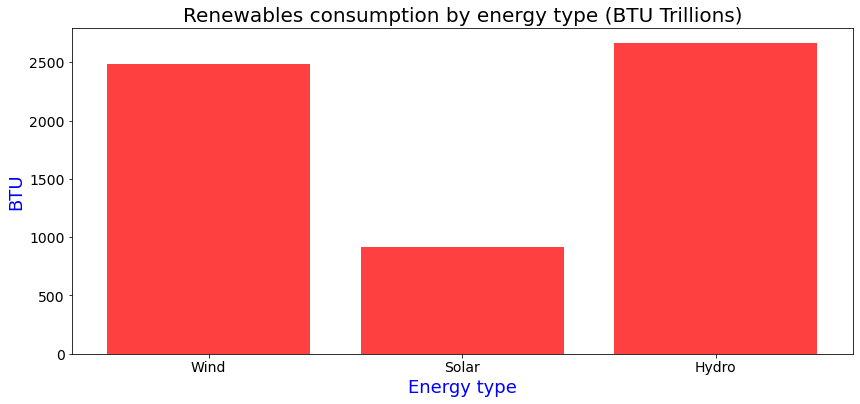

In [17]:
# Study data files
path = "resources/State-by State Renewable Energy Consumption.csv"

# Read the mouse data and the study results
renewable_cons_df = pd.read_csv(path, index_col=0)
renewable_cons_df


wind = renewable_cons_df['Wind'].sum()
solar = renewable_cons_df['Solar'].sum()
hydro = renewable_cons_df['Hydroelectric'].sum()
wind

energies = ["Wind", "Solar", "Hydro"]
consume = [wind, solar, hydro]
x_axis = np.arange(len(energies))

plt.figure(figsize=(14, 6)) 

# Create a bar chart based upon the above data
plt.bar(energies,  
        consume, 
        color='r', 
        alpha=0.75, 
        align='center')

plt.title('Renewables consumption by energy type (BTU Trillions)', fontsize=20)
plt.ylabel("BTU", fontsize=18, color='blue')
plt.xlabel("Energy type", fontsize=18,color='blue')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.grid(True)                 # Adding grid for reference

# Save the figure
plt.savefig("figures/bar_type_energy.png")

plt.show()






## Statistics check. Central tendency

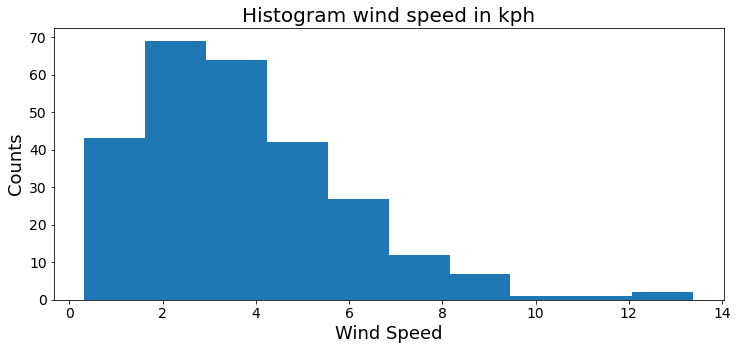

Mean is: 3.73
Median is: 3.09
Mode is: 0    2.57
dtype: float64

NormaltestResult(statistic=64.73562576370259, pvalue=8.766726828506932e-15)


In [18]:
                                    
plt.figure(figsize=(12, 5))    # Set up total size of graph
plt.hist(working_weather_data_df['Local Wind (kph)'])

plt.title('Histogram wind speed in kph', fontsize=20)
plt.ylabel("Counts", fontsize=18)
plt.xlabel("Wind Speed", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.grid(True)                 # Adding grid for reference

# Save the figure
plt.savefig("figures/wind_speed.png")

plt.show()

print(f"Mean is: {round(working_weather_data_df['Local Wind (kph)'].mean(),2)}")
print(f"Median is: {round(working_weather_data_df['Local Wind (kph)'].median(),2)}")
print(f"Mode is: {round(working_weather_data_df['Local Wind (kph)'].mode(),2)}")
print("")
print(st.normaltest(working_weather_data_df['Local Wind (kph)']))

         

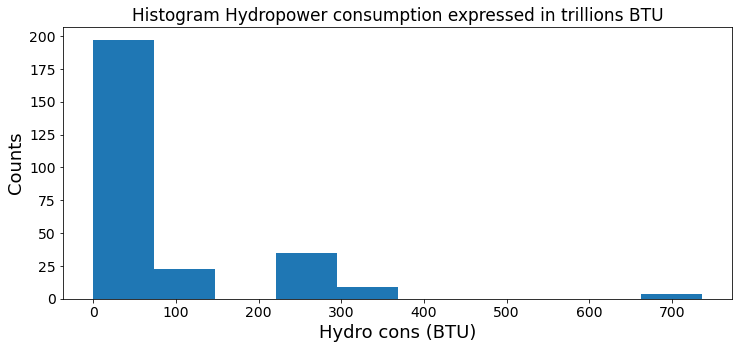

Mean is: 76.0
Median is: 17.1
Mode is: 0    239.7
dtype: float64

NormaltestResult(statistic=186.02323837389895, pvalue=4.032431830313565e-41)


In [19]:
                                    
plt.figure(figsize=(12, 5))    # Set up total size of graph

plt.hist(working_weather_data_df['Hydro cons (BTU)'])

plt.title('Histogram Hydropower consumption expressed in trillions BTU', fontsize=17)
plt.ylabel("Counts", fontsize=18)
plt.xlabel("Hydro cons (BTU)", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.grid(True)                 # Adding grid for reference

# Save the figure
plt.savefig("figures/Hydropower_consumption_BTU.png")

plt.show()

print(f"Mean is: {round(working_weather_data_df['Hydro cons (BTU)'].mean(),2)}")
print(f"Median is: {round(working_weather_data_df['Hydro cons (BTU)'].median(),2)}")
print(f"Mode is: {round(working_weather_data_df['Hydro cons (BTU)'].mode(),2)}")
print("")
print(st.normaltest(working_weather_data_df['Hydro cons (BTU)']))

## SEE ABOVE: p-value < 0.05 means both samples are not normally distributed
p value very low or close to 0.000 it means that, or the interpretation would be that the results are significant, same as in the case of other values below the selected threshold for significance. Yipically < 0.05

# Precipitation vs Altitude. Correlation and regression

 The correlation between both factors is: -0.58
 Tipically closest to 1 or -1. Bigger than 0.75 or smaller than -0.75


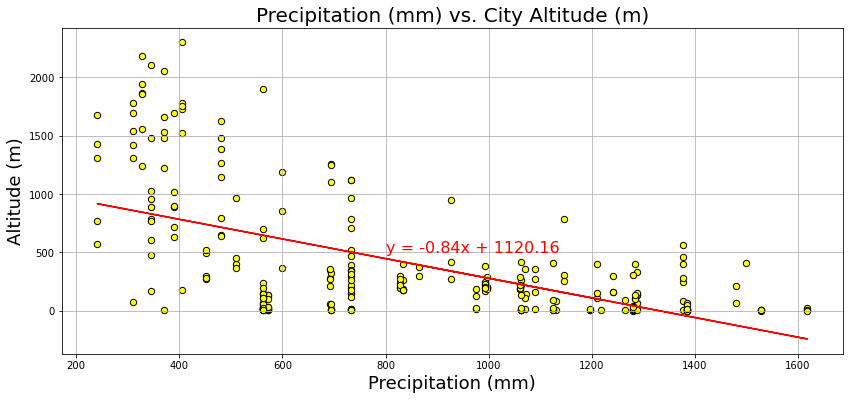

In [20]:
precip = working_weather_data_df["Precip_mm"]
altitude = working_weather_data_df["Altitude (m)"]
correlation = st.pearsonr(precip, altitude)


# Calculate linear regression for above values weight and tumor volume
(slope, intercept, rvalue, pvalue, stderr) = linregress(precip, altitude)
regress_values = precip * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) # equation of a line y = mx + b 

plt.figure(figsize=(14, 6))    # Set up total size of graph

# Plot scatter 
plt.scatter(precip, altitude, 
            marker="o", 
            s=40,                            # bigger size of markers
            color="yellow",
            edgecolors='black')              # to get better contrast, I outline dots in black


# plot linear regression with variables
plt.plot(precip,regress_values,"r-")

# Show formula for linear regression
plt.annotate(line_eq,(800,500),              # position of line formula within x, y values in graph
             fontsize=16,
             color="red")  

    
# Titles of whole plot, x and y axis labels
plt.title("Precipitation (mm) vs. City Altitude (m)", fontsize=20)
plt.ylabel("Altitude (m)", fontsize=18)
plt.xlabel("Precipitation (mm)", fontsize=18)
plt.grid(True)                 # Adding grid for reference

# Save the figure
plt.savefig("figures/altitude_vs_precipitation.png")

print(f" The correlation between both factors is: {round(correlation[0],2)}")
print(" Typically closest to 1 or -1. Bigger than 0.75 or smaller than -0.75")

# Show plot
plt.show()


# Precipitation vs Latitude. Correlation and regression

 The correlation between both factors is: -0.4
 Tipically closest to 1 or -1. Bigger than 0.75 or smaller than -0.75


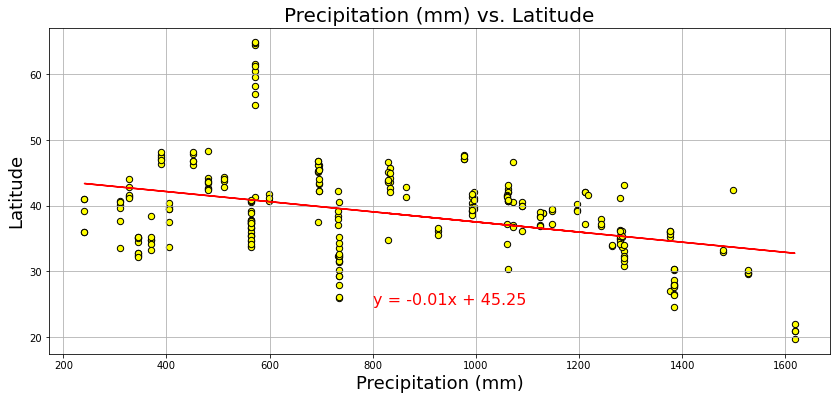

In [21]:
precip = working_weather_data_df["Precip_mm"]
latitude = working_weather_data_df["Lat"]
correlation = st.pearsonr(precip, latitude)


# Calculate linear regression for above values weight and tumor volume
(slope, intercept, rvalue, pvalue, stderr) = linregress(precip, latitude)
regress_values = precip * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) # equation of a line y = mx + b 

plt.figure(figsize=(14, 6))    # Set up total size of graph

# Plot scatter 
plt.scatter(precip, latitude, 
            marker="o", 
            s=40,                            # bigger size of markers
            color="yellow",
            edgecolors='black')              # to get better contrast, I outline dots in black


# plot linear regression with variables
plt.plot(precip,regress_values,"r-")

# # Show formula for linear regression
plt.annotate(line_eq,(800,25),              # position of line formula within x, y values in graph
             fontsize=16,
             color="red")  

    
# Titles of whole plot, x and y axis labels
plt.title("Precipitation (mm) vs. Latitude", fontsize=20)
plt.ylabel("Latitude", fontsize=18)
plt.xlabel("Precipitation (mm)", fontsize=18)
plt.grid(True)                 # Adding grid for reference

# Save the figure
plt.savefig("figures/latitude_vs_precipitation.png")

print(f" The correlation between both factors is: {round(correlation[0],2)}")
print(" Typically closest to 1 or -1. Bigger than 0.75 or smaller than -0.75")

# Show plot
plt.show()

# Solar Radiation vs Latitude Plot. Correlation. Regression

 The correlation between both factors is: -0.48
 Tipically closest to 1 or -1. Bigger than 0.75 or smaller than -0.75


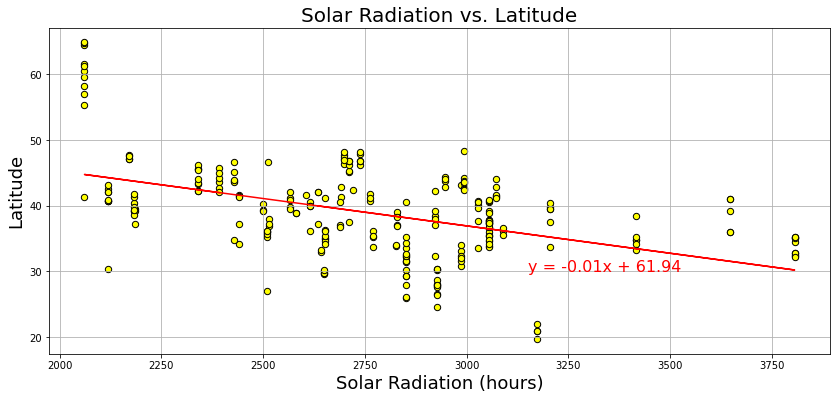

In [22]:
solar = working_weather_data_df["Sun Radiation (h)"]
latitude = working_weather_data_df["Lat"]
correlation = st.pearsonr(solar, latitude)


# Calculate linear regression for above values weight and tumor volume
(slope, intercept, rvalue, pvalue, stderr) = linregress(solar, latitude)
regress_values = solar * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) # equation of a line y = mx + b 

plt.figure(figsize=(14, 6))    # Set up total size of graph

# Plot scatter 
plt.scatter(solar, latitude, 
            marker="o", 
            s=40,                            # bigger size of markers
            color="yellow",
            edgecolors='black')              # to get better contrast, I outline dots in black


# plot linear regression with variables
plt.plot(solar,regress_values,"r-")

# Show formula for linear regression
plt.annotate(line_eq,(3150,30),              # position of line formula within x, y values in graph
             fontsize=16,
             color="red")  

    
# Titles of whole plot, x and y axis labels
plt.title("Solar Radiation vs. Latitude", fontsize=20)
plt.ylabel("Latitude", fontsize=18)
plt.xlabel("Solar Radiation (hours)", fontsize=18)
plt.grid(True)                 # Adding grid for reference

# Save the figure
plt.savefig("figures/solar_vs_latitude.png")

print(f" The correlation between both factors is: {round(correlation[0],2)}")
print(" Typically closest to 1 or -1. Bigger than 0.75 or smaller than -0.75")

# Show plot
plt.show()

# Solar Radiation vs Altitude Plot. Correlation. Regression

 The correlation between both factors is: 0.44
 Tipically closest to 1 or -1. Bigger than 0.75 or smaller than -0.75


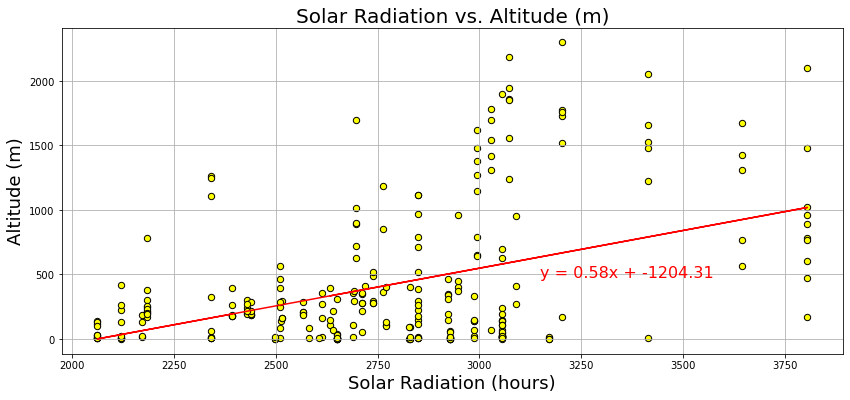

In [26]:
solar = working_weather_data_df["Sun Radiation (h)"]
altitude = working_weather_data_df["Altitude (m)"]
correlation = st.pearsonr(solar, altitude)


# Calculate linear regression for above values weight and tumor volume
(slope, intercept, rvalue, pvalue, stderr) = linregress(solar, altitude)
regress_values = solar * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) # equation of a line y = mx + b 

plt.figure(figsize=(14, 6))    # Set up total size of graph

# Plot scatter 
plt.scatter(solar, altitude, 
            marker="o", 
            s=40,                            # bigger size of markers
            color="yellow",
            edgecolors='black')              # to get better contrast, I outline dots in black


# plot linear regression with variables
plt.plot(solar,regress_values,"r-")

# Show formula for linear regression
plt.annotate(line_eq,(3150,480),              # position of line formula within x, y values in graph
             fontsize=16,
             color="red")  

    
# Titles of whole plot, x and y axis labels
plt.title("Solar Radiation vs. Altitude (m)", fontsize=20)
plt.ylabel("Altitude (m)", fontsize=18)
plt.xlabel("Solar Radiation (hours)", fontsize=18)
plt.grid(True)                 # Adding grid for reference

# Save the figure
plt.savefig("figures/solar_vs_altitude.png")

print(f" The correlation between both factors is: {round(correlation[0],2)}")
print(" Typically closest to 1 or -1. Bigger than 0.75 or smaller than -0.75")

# Show plot
plt.show()

#  Wind Speed (kph) vs Wind Power consumption Plot. Correlation. Regression

 The correlation between both factors is: 0.19
 Tipically closest to 1 or -1. Bigger than 0.75 or smaller than -0.75


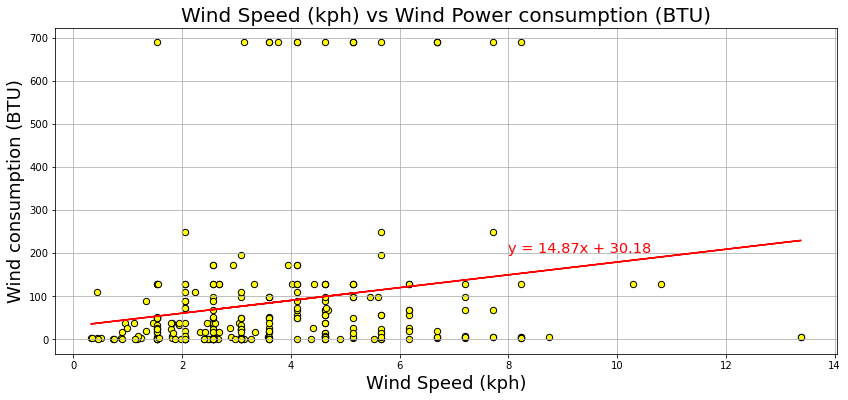

In [27]:
wind_speed = working_weather_data_df["Local Wind (kph)"]
wind_cons = working_weather_data_df["Wind cons (BTU)"]
correlation = st.pearsonr(wind_speed, wind_cons)


# Calculate linear regression for above values weight and tumor volume
(slope, intercept, rvalue, pvalue, stderr) = linregress(wind_speed, wind_cons)
regress_values = wind_speed * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) # equation of a line y = mx + b 

plt.figure(figsize=(14, 6))    # Set up total size of graph

# Plot scatter 
plt.scatter(wind_speed, wind_cons, 
            marker="o", 
            s=40,                            # bigger size of markers
            color="yellow",
            edgecolors='black')              # to get better contrast, I outline dots in black


# plot linear regression with variables
plt.plot(wind_speed,regress_values,"r-")

# Show formula for linear regression
plt.annotate(line_eq,(8,200),              # position of line formula within x, y values in graph
             fontsize=14.5,
             color="red")  

    
# Titles of whole plot, x and y axis labels
plt.title("Wind Speed (kph) vs Wind Power consumption (BTU)", fontsize=20)
plt.ylabel("Wind consumption (BTU)", fontsize=18)
plt.xlabel("Wind Speed (kph)", fontsize=18)
plt.grid(True)                 # Adding grid for reference

# Save the figure
plt.savefig("figures/wind_vs_eolic.png")

print(f" The correlation between both factors is: {round(correlation[0],2)}")
print(" Typically closest to 1 or -1. Bigger than 0.75 or smaller than -0.75")

# Show plot
plt.show()

#  Solar Radiation vs Solar consumption. Correlation. Regression

 The correlation between both factors is: 0.32
 Tipically closest to 1 or -1. Bigger than 0.75 or smaller than -0.75


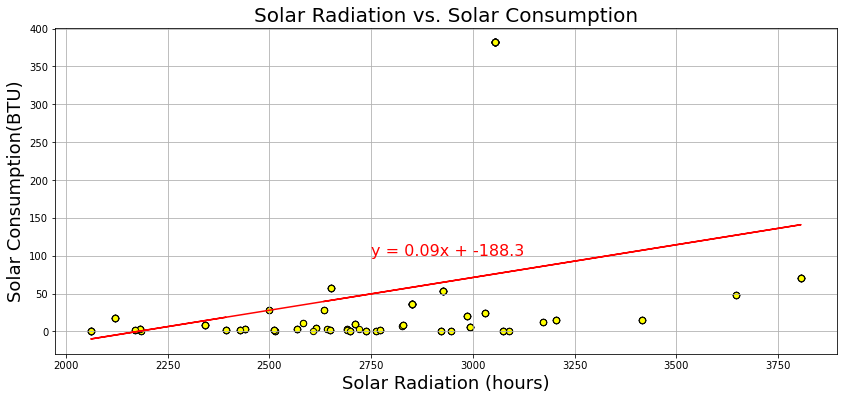

In [25]:
solar = working_weather_data_df["Sun Radiation (h)"]
solar_cons = working_weather_data_df["Solar cons (BTU)"]
correlation = st.pearsonr(solar, solar_cons)


# Calculate linear regression for above values weight and tumor volume
(slope, intercept, rvalue, pvalue, stderr) = linregress(solar, solar_cons)
regress_values = solar * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) # equation of a line y = mx + b 

plt.figure(figsize=(14, 6))    # Set up total size of graph

# Plot scatter 
plt.scatter(solar, solar_cons, 
            marker="o", 
            s=40,                            # bigger size of markers
            color="yellow",
            edgecolors='black')              # to get better contrast, I outline dots in black


# plot linear regression with variables
plt.plot(solar,regress_values,"r-")

# Show formula for linear regression
plt.annotate(line_eq,(2750,100),              # position of line formula within x, y values in graph
             fontsize=16,
             color="red")  

    
# Titles of whole plot, x and y axis labels
plt.title("Solar Radiation vs. Solar Consumption", fontsize=20)
plt.ylabel("Solar Consumption (BTU)", fontsize=18)
plt.xlabel("Solar Radiation (hours)", fontsize=18)
plt.grid(True)                 # Adding grid for reference

# Save the figure
plt.savefig("figures/solar_vs_solar_cons.png")

print(f" The correlation between both factors is: {round(correlation[0],2)}")
print(" Typically closest to 1 or -1. Bigger than 0.75 or smaller than -0.75")

# Show plot
plt.show()

#  Solar power consumption vs Altitude. Correlation. Regression

 The correlation between both factors is: -0.13
 Typically closest to 1 or -1. Bigger than 0.75 or smaller than -0.75


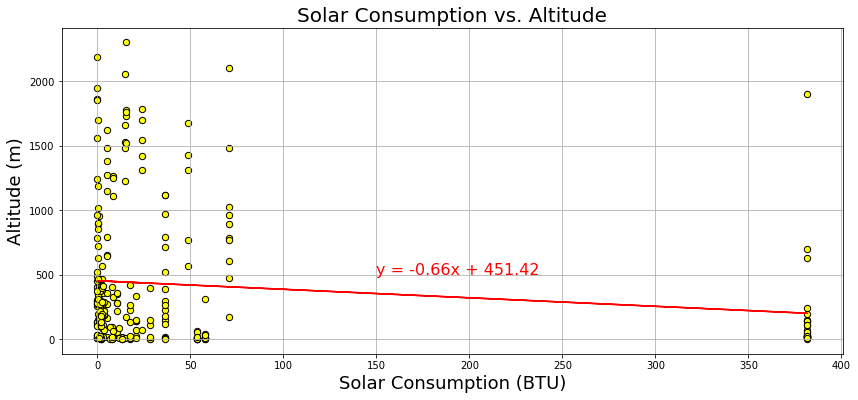

In [47]:
solar_cons = working_weather_data_df["Solar cons (BTU)"]
altitude = working_weather_data_df["Altitude (m)"]

correlation = st.pearsonr(solar_cons, altitude)


# Calculate linear regression for above values weight and tumor volume
(slope, intercept, rvalue, pvalue, stderr) = linregress(solar_cons, altitude)
regress_values = solar_cons * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) # equation of a line y = mx + b 

plt.figure(figsize=(14, 6))    # Set up total size of graph

# Plot scatter 
plt.scatter(solar_cons, altitude, 
            marker="o", 
            s=40,                            # bigger size of markers
            color="yellow",
            edgecolors='black')              # to get better contrast, I outline dots in black


# plot linear regression with variables
plt.plot(solar_cons,regress_values,"r-")

# Show formula for linear regression
plt.annotate(line_eq,(150,500),              # position of line formula within x, y values in graph
             fontsize=16,
             color="red")  

    
# Titles of whole plot, x and y axis labels
plt.title("Solar Consumption vs. Altitude", fontsize=20)
plt.ylabel("Altitude (m)", fontsize=18)
plt.xlabel("Solar Consumption (BTU)", fontsize=18)
plt.grid(True)                 # Adding grid for reference

# Save the figure
plt.savefig("figures/solar_cons_vs_altitude.png")

print(f" The correlation between both factors is: {round(correlation[0],2)}")
print(" Typically closest to 1 or -1. Bigger than 0.75 or smaller than -0.75")

# Show plot
plt.show()

#  Hydropower consumption vs Altitude. Correlation. Regression

 The correlation between both factors is: -0.12
 Typically closest to 1 or -1. Bigger than 0.75 or smaller than -0.75


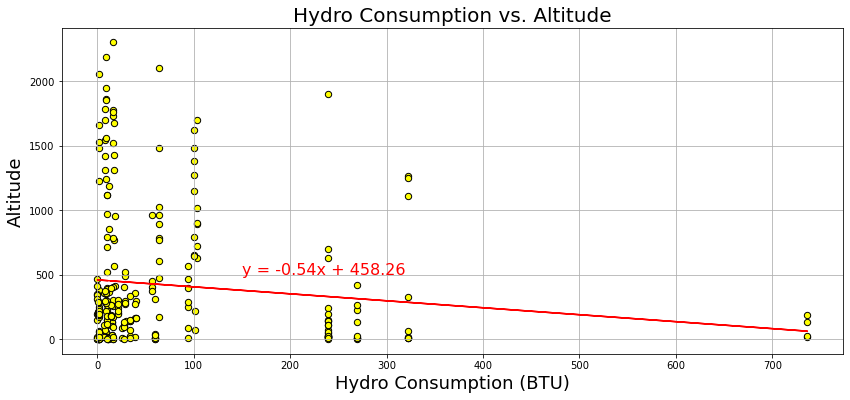

In [37]:
hydro_cons = working_weather_data_df["Hydro cons (BTU)"]
altitude = working_weather_data_df["Altitude (m)"]

correlation = st.pearsonr(hydro_cons, altitude)


# Calculate linear regression for above values weight and tumor volume
(slope, intercept, rvalue, pvalue, stderr) = linregress(hydro_cons, altitude)
regress_values = hydro_cons * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) # equation of a line y = mx + b 

plt.figure(figsize=(14, 6))    # Set up total size of graph

# Plot scatter 
plt.scatter(hydro_cons, altitude, 
            marker="o", 
            s=40,                            # bigger size of markers
            color="yellow",
            edgecolors='black')              # to get better contrast, I outline dots in black


# plot linear regression with variables
plt.plot(hydro_cons,regress_values,"r-")

# Show formula for linear regression
plt.annotate(line_eq,(150,500),              # position of line formula within x, y values in graph
             fontsize=16,
             color="red")  

    
# Titles of whole plot, x and y axis labels
plt.title("Hydro Consumption vs. Altitude", fontsize=20)
plt.ylabel("Altitude", fontsize=18)
plt.xlabel("Hydro Consumption (BTU)", fontsize=18)
plt.grid(True)                 # Adding grid for reference

# Save the figure
plt.savefig("figures/hydro_cons_vs_altitude.png")

print(f" The correlation between both factors is: {round(correlation[0],2)}")
print(" Typically closest to 1 or -1. Bigger than 0.75 or smaller than -0.75")

# Show plot
plt.show()

#  Eolic/Wind power consumption vs Altitude. Correlation. Regression

 The correlation between both factors is: -0.0
 Typically closest to 1 or -1. Bigger than 0.75 or smaller than -0.75


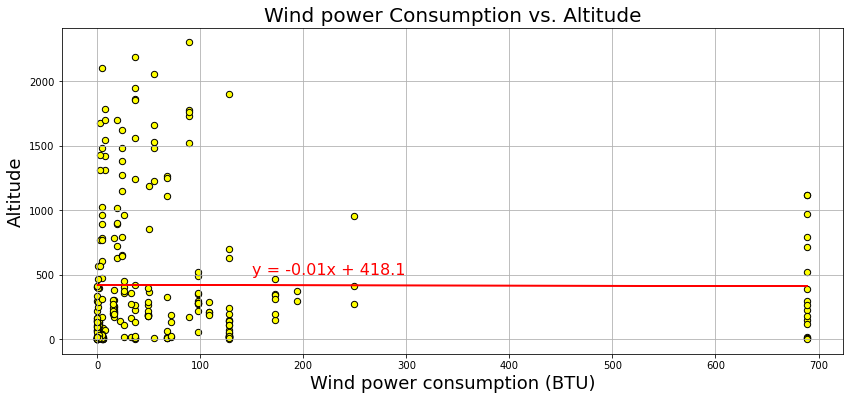

In [39]:
wind_cons = working_weather_data_df["Wind cons (BTU)"]
altitude = working_weather_data_df["Altitude (m)"]

correlation = st.pearsonr(wind_cons, altitude)


# Calculate linear regression for above values weight and tumor volume
(slope, intercept, rvalue, pvalue, stderr) = linregress(wind_cons, altitude)
regress_values = wind_cons * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) # equation of a line y = mx + b 

plt.figure(figsize=(14, 6))    # Set up total size of graph

# Plot scatter 
plt.scatter(wind_cons, altitude, 
            marker="o", 
            s=40,                            # bigger size of markers
            color="yellow",
            edgecolors='black')              # to get better contrast, I outline dots in black


# plot linear regression with variables
plt.plot(wind_cons,regress_values,"r-")

# Show formula for linear regression
plt.annotate(line_eq,(150,500),              # position of line formula within x, y values in graph
             fontsize=16,
             color="red")  

    
# Titles of whole plot, x and y axis labels
plt.title("Wind power Consumption vs. Altitude", fontsize=20)
plt.ylabel("Altitude", fontsize=18)
plt.xlabel("Wind power consumption (BTU)", fontsize=18)
plt.grid(True)                 # Adding grid for reference

# Save the figure
plt.savefig("figures/wind_cons_vs_altitude.png")

print(f" The correlation between both factors is: {round(correlation[0],2)}")
print(" Typically closest to 1 or -1. Bigger than 0.75 or smaller than -0.75")

# Show plot
plt.show()

# Check consumption eliminating outliers

 The correlation between both factors is: 0.04
 Typically closest to 1 or -1. Bigger than 0.75 or smaller than -0.75


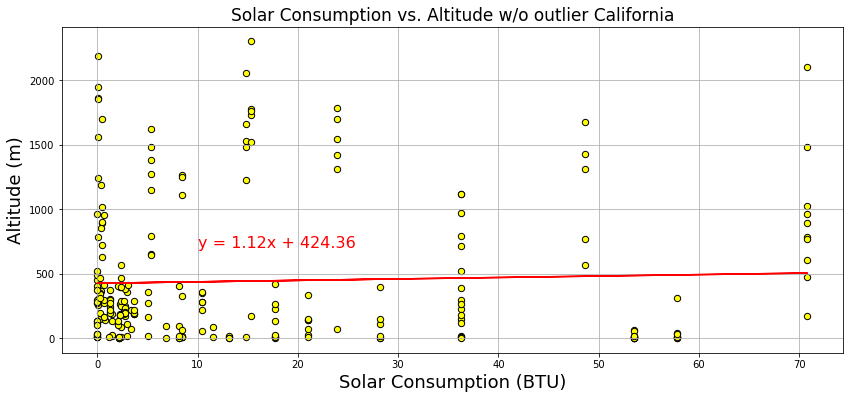

In [46]:
# From main dataset elimination of California as outlier
# working_weather_data_df

working_weather_data_outl_solar_df = working_weather_data_df[~working_weather_data_df['State'].str.contains('California')]
# working_weather_data_outl_solar_df

solar_cons = working_weather_data_outl_solar_df["Solar cons (BTU)"]
altitude = working_weather_data_outl_solar_df["Altitude (m)"]

correlation = st.pearsonr(solar_cons, altitude)


# Calculate linear regression for above values weight and tumor volume
(slope, intercept, rvalue, pvalue, stderr) = linregress(solar_cons, altitude)
regress_values = solar_cons * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) # equation of a line y = mx + b 

plt.figure(figsize=(14, 6))    # Set up total size of graph

# Plot scatter 
plt.scatter(solar_cons, altitude, 
            marker="o", 
            s=40,                            # bigger size of markers
            color="yellow",
            edgecolors='black')              # to get better contrast, I outline dots in black


# plot linear regression with variables
plt.plot(solar_cons,regress_values,"r-")

# Show formula for linear regression
plt.annotate(line_eq,(10,700),              # position of line formula within x, y values in graph
             fontsize=16,
             color="red")  

    
# Titles of whole plot, x and y axis labels
plt.title("Solar Consumption vs. Altitude w/o outlier California", fontsize=17)
plt.ylabel("Altitude (m)", fontsize=18)
plt.xlabel("Solar Consumption (BTU)", fontsize=18)
plt.grid(True)                 # Adding grid for reference

# Save the figure
plt.savefig("figures/solar_cons_wo_outliers_vs_altitude.png")

print(f" The correlation between both factors is: {round(correlation[0],2)}")
print(" Typically closest to 1 or -1. Bigger than 0.75 or smaller than -0.75")

# Show plot
plt.show()


 The correlation between both factors is: -0.1
 Typically closest to 1 or -1. Bigger than 0.75 or smaller than -0.75


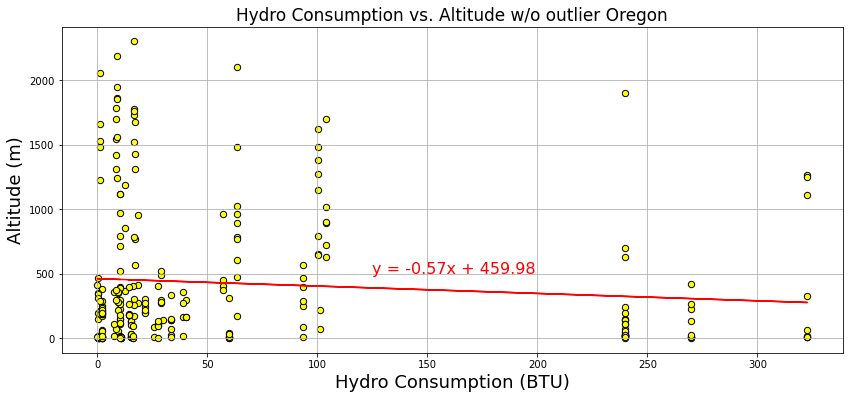

In [52]:
# From main dataset elimination of Oregon as outlier
# working_weather_data_df

working_weather_data_outl_hydro_df = working_weather_data_df[~working_weather_data_df['State'].str.contains('Washington')]
working_weather_data_outl_hydro_df

hydro_cons = working_weather_data_outl_hydro_df["Hydro cons (BTU)"]
altitude = working_weather_data_outl_hydro_df["Altitude (m)"]

correlation = st.pearsonr(hydro_cons, altitude)


# Calculate linear regression for above values weight and tumor volume
(slope, intercept, rvalue, pvalue, stderr) = linregress(hydro_cons, altitude)
regress_values = hydro_cons * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) # equation of a line y = mx + b 

plt.figure(figsize=(14, 6))    # Set up total size of graph

# Plot scatter 
plt.scatter(hydro_cons, altitude, 
            marker="o", 
            s=40,                            # bigger size of markers
            color="yellow",
            edgecolors='black')              # to get better contrast, I outline dots in black


# plot linear regression with variables
plt.plot(hydro_cons,regress_values,"r-")

# Show formula for linear regression
plt.annotate(line_eq,(125,500),              # position of line formula within x, y values in graph
             fontsize=16,
             color="red")  

    
# Titles of whole plot, x and y axis labels
plt.title("Hydro Consumption vs. Altitude w/o outlier Oregon", fontsize=17)
plt.ylabel("Altitude (m)", fontsize=18)
plt.xlabel("Hydro Consumption (BTU)", fontsize=18)
plt.grid(True)                 # Adding grid for reference

# Save the figure
plt.savefig("figures/hydro_cons_wo_outliers_vs_altitude.png")

print(f" The correlation between both factors is: {round(correlation[0],2)}")
print(" Typically closest to 1 or -1. Bigger than 0.75 or smaller than -0.75")

# Show plot
plt.show()

 The correlation between both factors is: 0.01
 Typically closest to 1 or -1. Bigger than 0.75 or smaller than -0.75


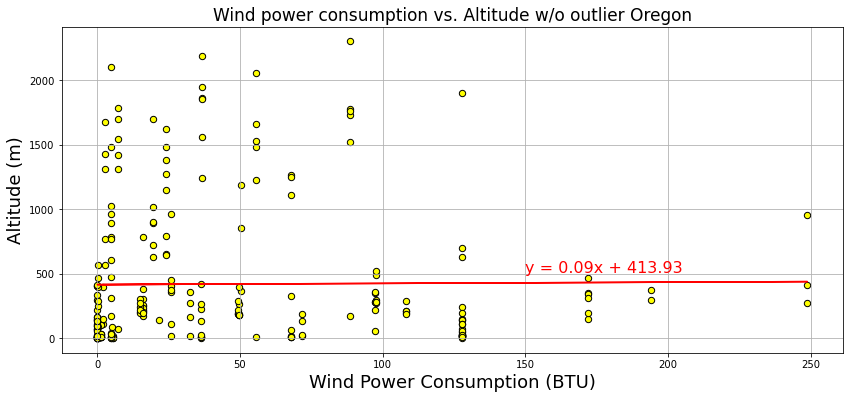

In [54]:
# From main dataset elimination of Texas as outlier
# working_weather_data_df

working_weather_data_outl_wind_df = working_weather_data_df[~working_weather_data_df['State'].str.contains('Texas')]
working_weather_data_outl_wind_df

wind_cons = working_weather_data_outl_wind_df["Wind cons (BTU)"]
altitude = working_weather_data_outl_wind_df["Altitude (m)"]

correlation = st.pearsonr(wind_cons, altitude)


# Calculate linear regression for above values weight and tumor volume
(slope, intercept, rvalue, pvalue, stderr) = linregress(wind_cons, altitude)
regress_values = wind_cons * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) # equation of a line y = mx + b 

plt.figure(figsize=(14, 6))    # Set up total size of graph

# Plot scatter 
plt.scatter(wind_cons, altitude, 
            marker="o", 
            s=40,                            # bigger size of markers
            color="yellow",
            edgecolors='black')              # to get better contrast, I outline dots in black


# plot linear regression with variables
plt.plot(wind_cons,regress_values,"r-")

# Show formula for linear regression
plt.annotate(line_eq,(150,510),              # position of line formula within x, y values in graph
             fontsize=16,
             color="red")  

    
# Titles of whole plot, x and y axis labels
plt.title("Wind power consumption vs. Altitude w/o outlier Oregon", fontsize=17)
plt.ylabel("Altitude (m)", fontsize=18)
plt.xlabel("Wind Power Consumption (BTU)", fontsize=18)
plt.grid(True)                 # Adding grid for reference

# Save the figure
plt.savefig("figures/wind_cons_wo_outliers_vs_altitude.png")

print(f" The correlation between both factors is: {round(correlation[0],2)}")
print(" Typically closest to 1 or -1. Bigger than 0.75 or smaller than -0.75")

# Show plot
plt.show()